In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Reshape, TimeDistributed, Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

Using TensorFlow backend.


In [2]:
#Data
data = np.load("mnist_test_seq.npy")

# Put data into format (training samples, frames, width, height)
data = np.swapaxes(data, 0, 1)

# Take a part of the dataset
input_sequence_frames = data[6000:9000, :10, :, :]
output_frames = data[6000:9000, 10:11, :, :]
test_input_sequence_frames = data[9000:, :10, :, :]
test_output_frames = data[9000:, 10:11, :, :]

#Scaling values between -1 and 1
input_sequence_frames = (input_sequence_frames - 127.5) / 255.0
output_frames = (output_frames - 127.5) / 255.0
test_input_sequence_frames = (test_input_sequence_frames - 127.5) / 255.0
test_output_frames = (output_frames - 127.5) / 255.0

# Add new axis for 1 channel images
# input_sequence_frames = input_sequence_frames[:,:,:,:,np.newaxis]
# output_frames = output_frames[:,:,:,:,np.newaxis]
# test_input_sequence_frames = test_input_sequence_frames[:,:,:,:,np.newaxis]
# test_output_frames = test_output_frames[:,:,:,:,np.newaxis]

#Flattening pixels to 1d vector. Don't do this if using CNN's
input_sequence_frames = input_sequence_frames.reshape(input_sequence_frames.shape[0], input_sequence_frames.shape[1], 4096)
output_frames = output_frames.reshape(output_frames.shape[0], 4096)
test_input_sequence_frames = test_input_sequence_frames.reshape(test_input_sequence_frames.shape[0], test_input_sequence_frames.shape[1], 4096)
test_output_frames = test_output_frames.reshape(test_output_frames.shape[0], 4096)

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_test_seq.npy'

In [ ]:
# Define Model 1: Flattened Input AE with MSE
model1 = Sequential()
model1.add(TimeDistributed(Dense(1024, activation='relu'), input_shape=(10, 4096)))
model1.add(TimeDistributed(Dense(64, activation='relu'), input_shape=(10, 1024)))
model1.add(LSTM(units=64, input_shape=(10, 2048)))
model1.add(Dense(1024, activation='tanh')) #Tanh activation scales between [-1, 1]
model1.add(Dense(4096, activation='tanh')) #Tanh activation scales between [-1, 1]
model1.compile(loss="mean_squared_error", optimizer='adam')
model1.summary()

In [ ]:
# Define Model 2: Flattened Input AE with Cross Entropy
model2 = Sequential()
model2.add(TimeDistributed(Dense(1024, activation='relu'), input_shape=(10, 4096)))
model2.add(TimeDistributed(Dense(64, activation='relu'), input_shape=(10, 1024)))
model2.add(LSTM(units=64, input_shape=(10, 2048)))
model2.add(Dense(1024, activation='tanh')) #Tanh activation scales between [-1, 1]
model2.add(Dense(4096, activation='tanh')) #Tanh activation scales between [-1, 1]
model2.compile(loss="binary_crossentropy", optimizer='adam')
model2.summary()

In [ ]:
# Train Model 1
for epoch in range(250):
    model1.fit(input_sequence_frames, output_frames, batch_size=100,
        epochs=1)
    print("Epoch:",epoch)
    
    inputs = input_sequence_frames[epoch*10: (epoch+1)*10]
    ground_truth = output_frames[epoch*10: (epoch+1)*10]
    predictions = model1.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()
model1.save('model1.h5')

In [ ]:
for epoch in range(250):
    model2.fit(input_sequence_frames, output_frames, batch_size=100,
        epochs=1)
    print("Epoch:",epoch)
    
    inputs = input_sequence_frames[epoch*10: (epoch+1)*10]
    ground_truth = output_frames[epoch*10: (epoch+1)*10]
    predictions = model2.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()
model2.save('model2.h5')

In [2]:
data = np.load("mnist_test_seq.npy")
# Put data into format (training samples, frames, width, height)
data = np.swapaxes(data, 0, 1)

# Take a part of the dataset
input_sequence_frames = data[6000:9000, :10, :, :]
output_frames = data[6000:9000, 10:11, :, :]
test_input_sequence_frames = data[9000:, :10, :, :]
test_output_frames = data[9000:, 10:11, :, :]



#Scaling values between -1 and 1
input_sequence_frames = (input_sequence_frames - 127.5) / 255.0
output_frames = (output_frames - 127.5) / 255.0
test_input_sequence_frames = (test_input_sequence_frames - 127.5) / 255.0
test_output_frames = (output_frames - 127.5) / 255.0

# Add new axis for 1 channel images
input_sequence_frames = input_sequence_frames[:,:,:,:,np.newaxis]
output_frames = output_frames[:,:,:,:,np.newaxis]
test_input_sequence_frames = test_input_sequence_frames[:,:,:,:,np.newaxis]
test_output_frames = test_output_frames[:,:,:,:,np.newaxis]

In [3]:
output_frames.shape
output_frames = np.squeeze(output_frames, axis=1)
test_output_frames = np.squeeze(test_output_frames, axis=1)
# plt.plot(test_output_frames[0])
# plt.show()

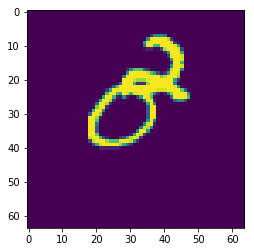

In [4]:
output_frames.shape
plt.imshow(np.squeeze(test_output_frames[1], axis=2))
# plt.show()

In [5]:
#Define filters
filters = 10

model3 = Sequential()
model3.add(ConvLSTM2D(filters=filters, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True))
model3.add(BatchNormalization())

model3.add(ConvLSTM2D(filters=filters, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model3.add(BatchNormalization())

model3.add(ConvLSTM2D(filters=filters, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model3.add(BatchNormalization())

model3.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same'))
#Have model return one image with one channel/filter
#Output shape = (batch_size, 1, 64, 64, 1)
# model3.add(BatchNormalization())

# model3.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
#                activation='sigmoid',
#                padding='same', data_format='channels_last'))
model3.compile(loss='mse', optimizer='adam')
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 64, 64, 10)    4000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 64, 64, 10)    40        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 64, 64, 10)    7240      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64, 64, 10)    40        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 10, 64, 64, 10)    7240      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 64, 64, 10)    40        
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, 64, 64, 1)        

Epoch: 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0334


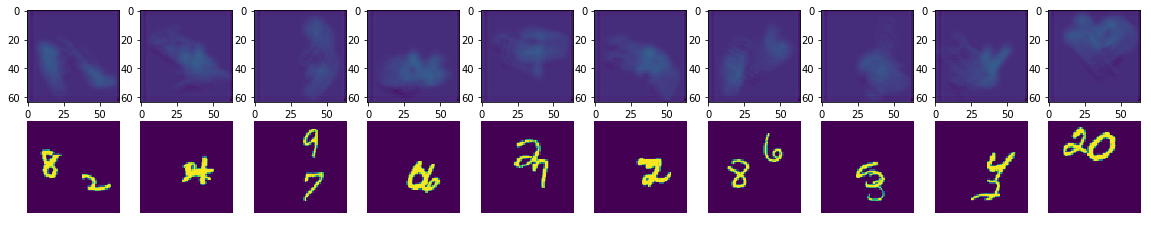

-----------------------------------
Epoch: 2
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0218


<Figure size 432x288 with 0 Axes>

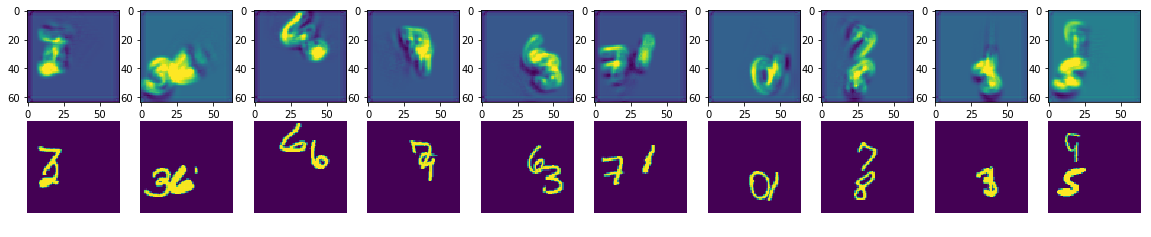

-----------------------------------
Epoch: 3
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0209


<Figure size 432x288 with 0 Axes>

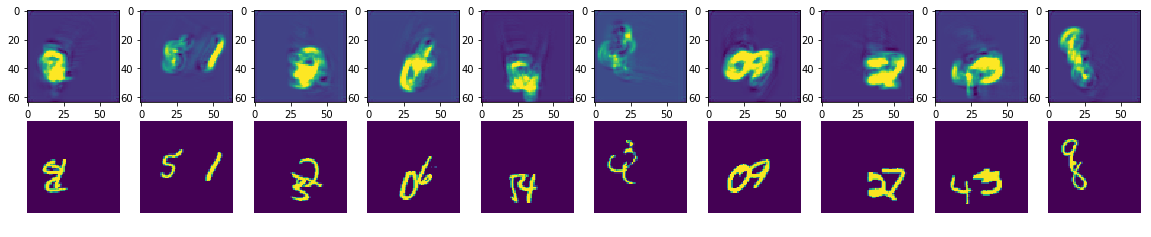

-----------------------------------
Epoch: 4
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0203


<Figure size 432x288 with 0 Axes>

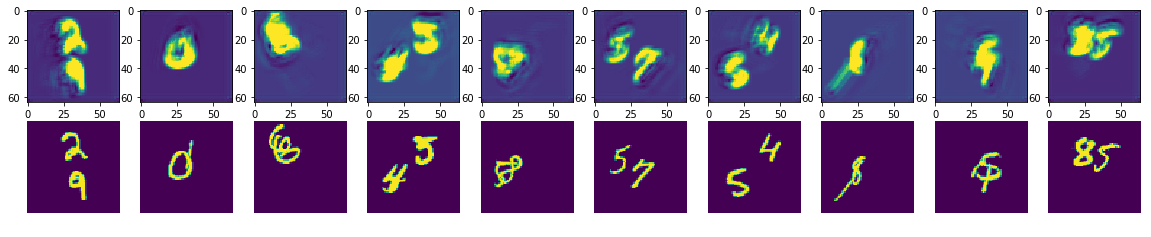

-----------------------------------
Epoch: 5
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0199


<Figure size 432x288 with 0 Axes>

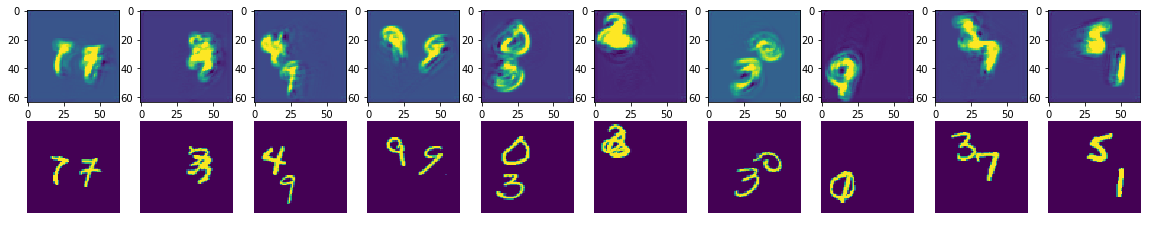

-----------------------------------
Epoch: 6
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0197


<Figure size 432x288 with 0 Axes>

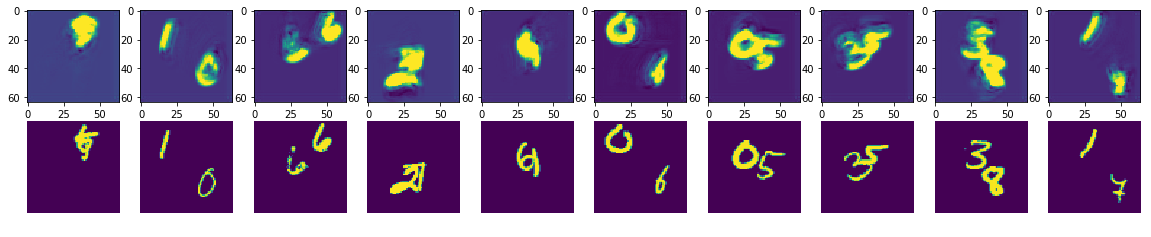

-----------------------------------
Epoch: 7
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0195


<Figure size 432x288 with 0 Axes>

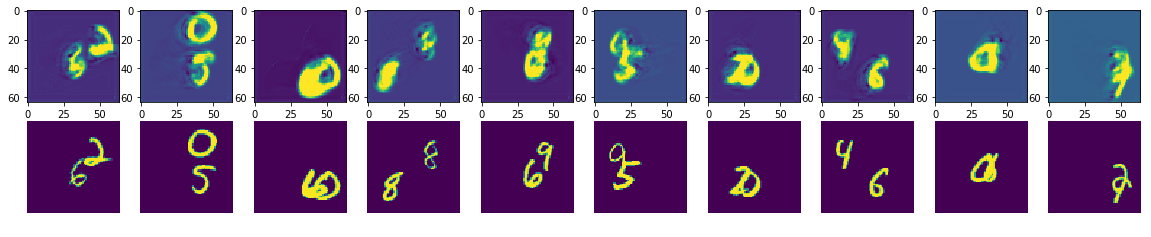

-----------------------------------
Epoch: 8
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0194


<Figure size 432x288 with 0 Axes>

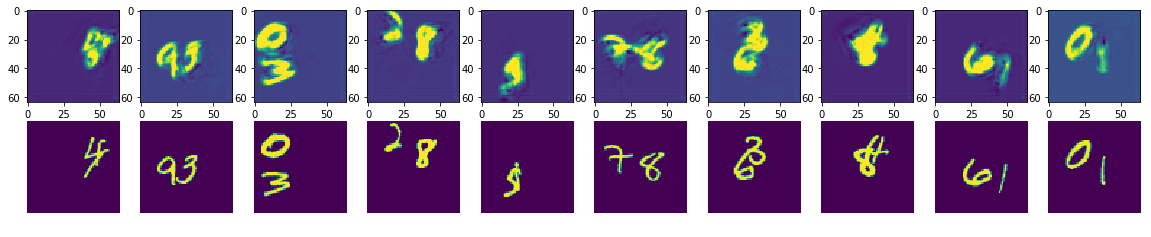

-----------------------------------
Epoch: 9
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0192


<Figure size 432x288 with 0 Axes>

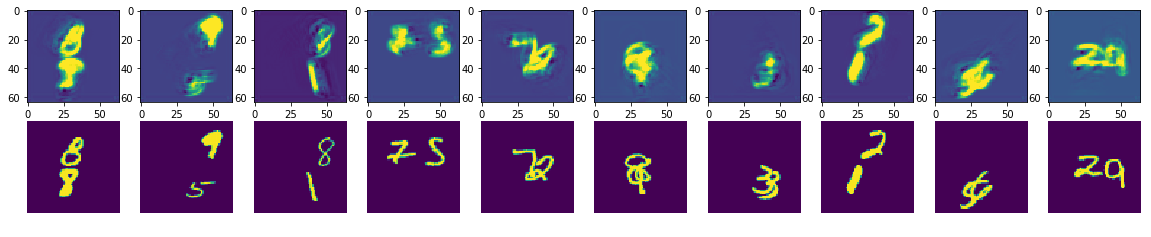

-----------------------------------
Epoch: 10
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0191


<Figure size 432x288 with 0 Axes>

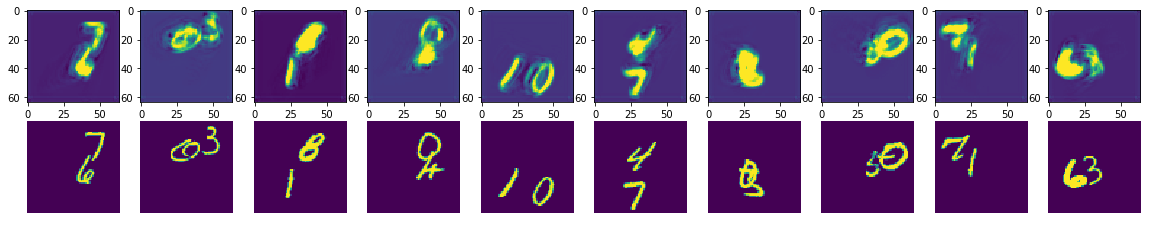

-----------------------------------
Epoch: 11
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0190


<Figure size 432x288 with 0 Axes>

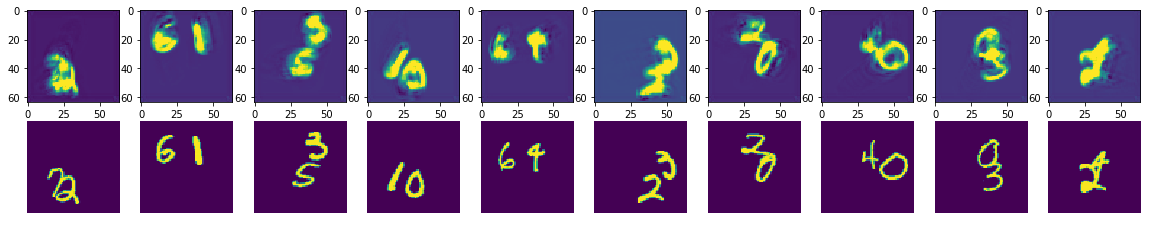

-----------------------------------
Epoch: 12
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0190


<Figure size 432x288 with 0 Axes>

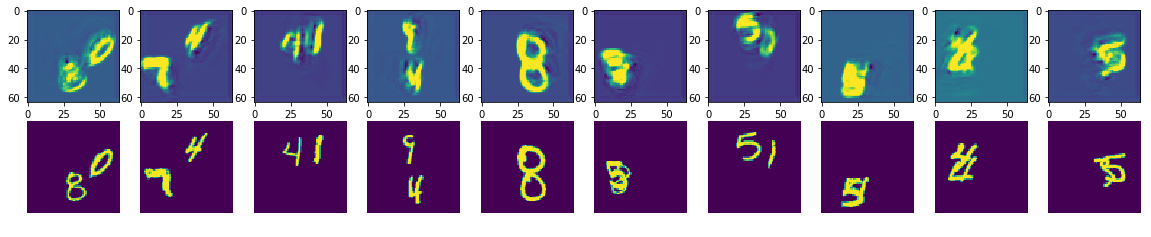

-----------------------------------
Epoch: 13
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0189


<Figure size 432x288 with 0 Axes>

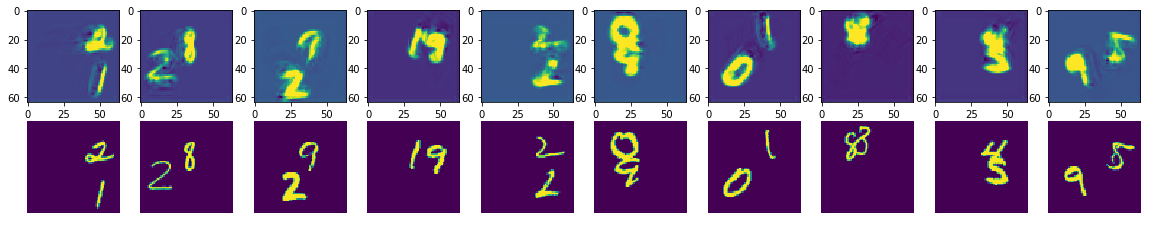

-----------------------------------
Epoch: 14
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0188


<Figure size 432x288 with 0 Axes>

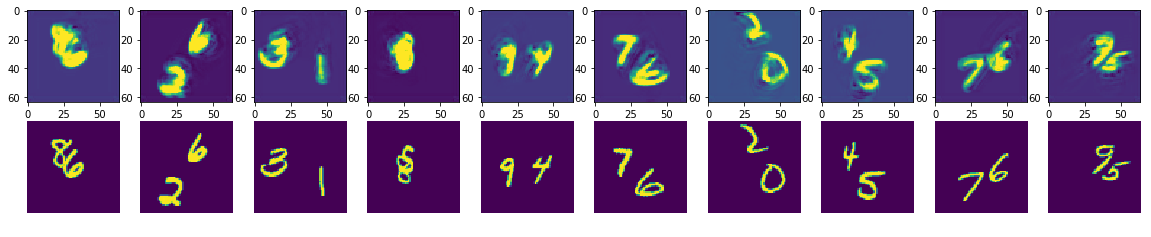

-----------------------------------
Epoch: 15
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0188


<Figure size 432x288 with 0 Axes>

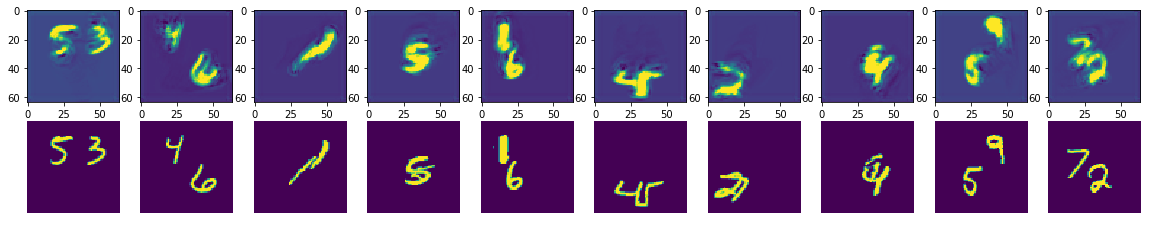

-----------------------------------
Epoch: 16
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0187


<Figure size 432x288 with 0 Axes>

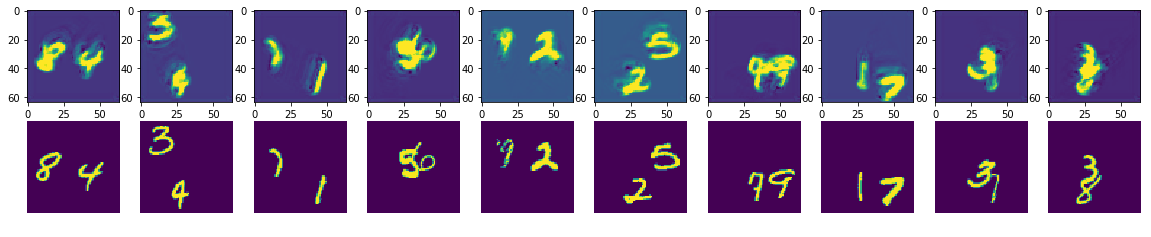

-----------------------------------
Epoch: 17
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0186


<Figure size 432x288 with 0 Axes>

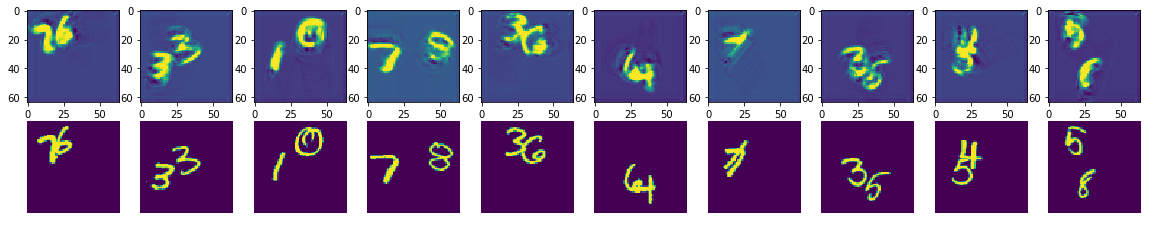

-----------------------------------
Epoch: 18
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0185


<Figure size 432x288 with 0 Axes>

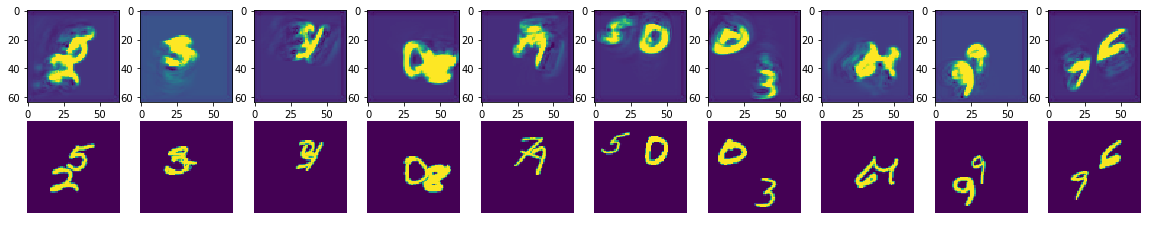

-----------------------------------
Epoch: 19
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0184


<Figure size 432x288 with 0 Axes>

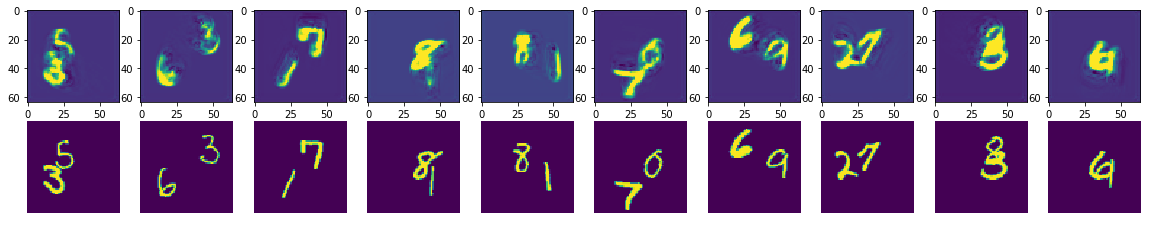

-----------------------------------
Epoch: 20
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0183


<Figure size 432x288 with 0 Axes>

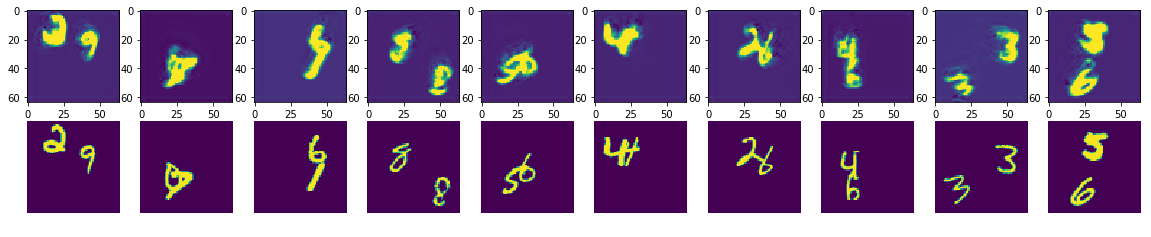

-----------------------------------
Epoch: 21
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0183


<Figure size 432x288 with 0 Axes>

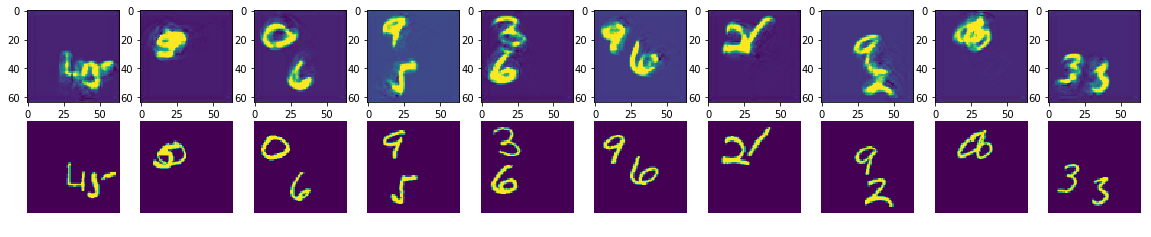

-----------------------------------
Epoch: 22
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0182


<Figure size 432x288 with 0 Axes>

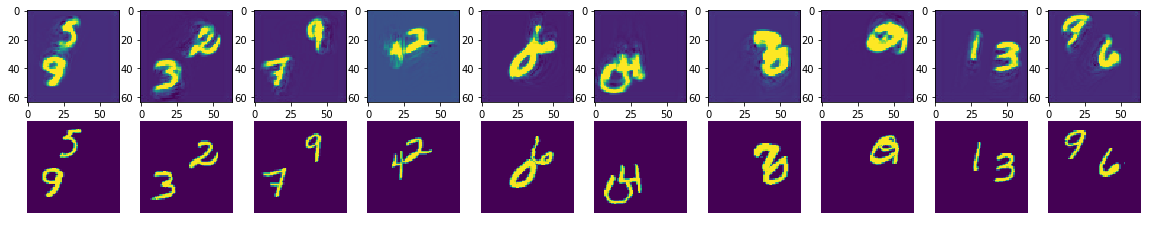

-----------------------------------
Epoch: 23
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0181


<Figure size 432x288 with 0 Axes>

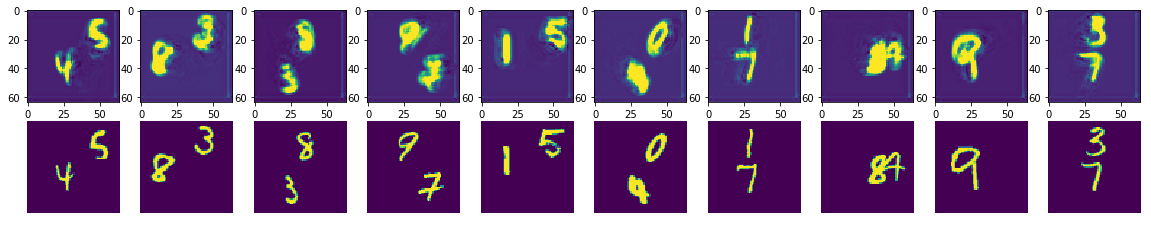

-----------------------------------
Epoch: 24
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0181


<Figure size 432x288 with 0 Axes>

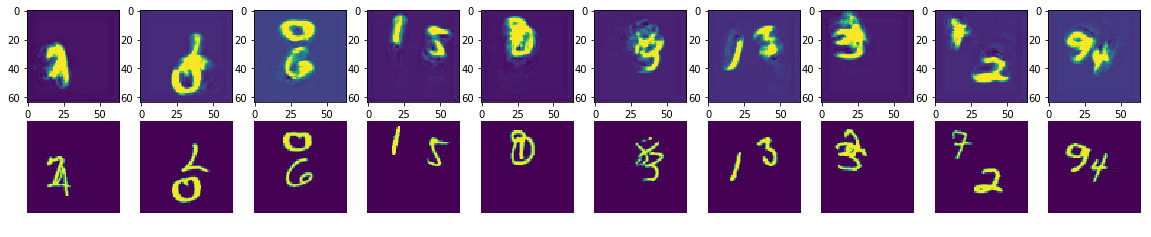

-----------------------------------
Epoch: 25
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0180


<Figure size 432x288 with 0 Axes>

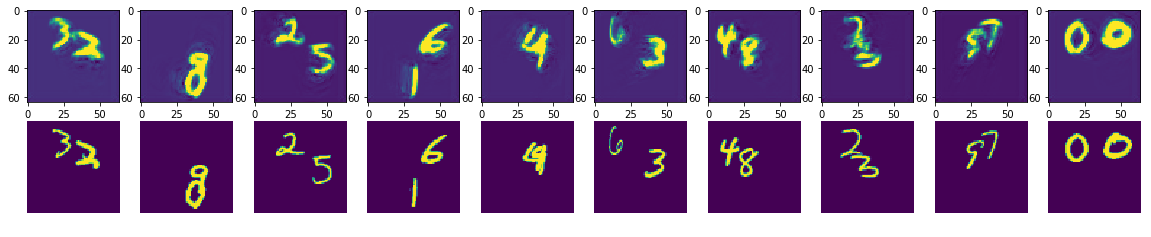

-----------------------------------
Epoch: 26
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0180


<Figure size 432x288 with 0 Axes>

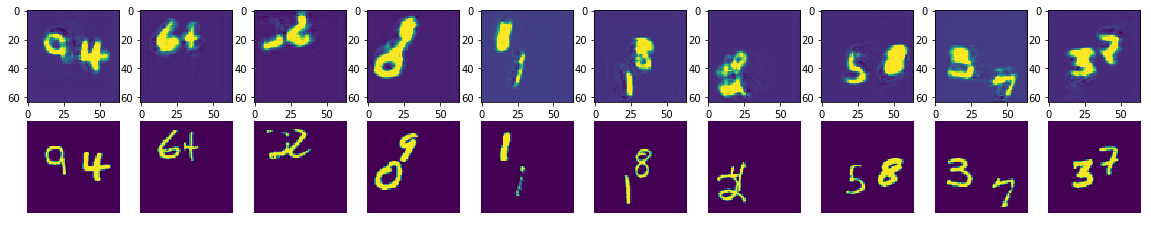

-----------------------------------
Epoch: 27
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0179


<Figure size 432x288 with 0 Axes>

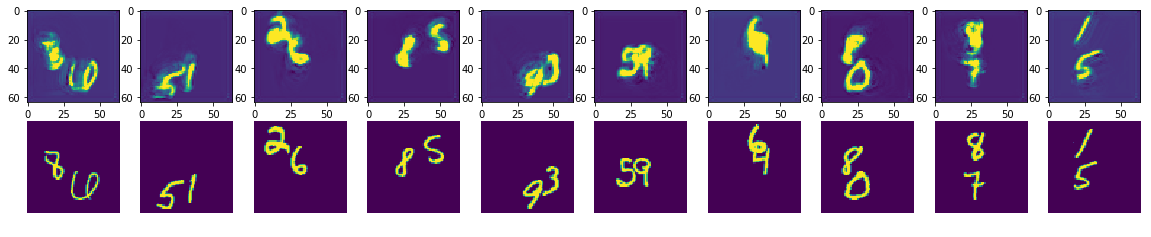

-----------------------------------
Epoch: 28
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0179


<Figure size 432x288 with 0 Axes>

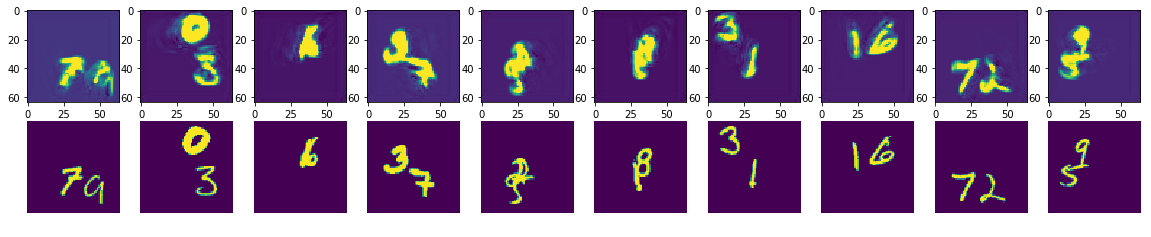

-----------------------------------
Epoch: 29
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0178


<Figure size 432x288 with 0 Axes>

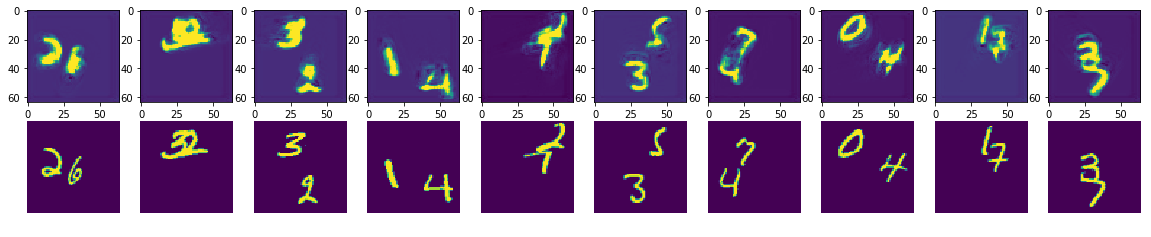

-----------------------------------
Epoch: 30
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0178


<Figure size 432x288 with 0 Axes>

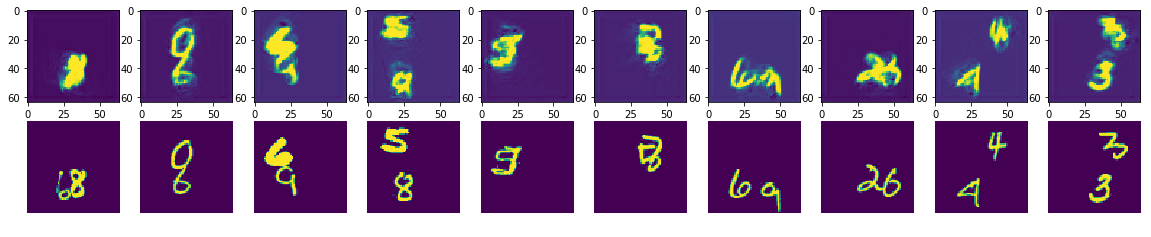

-----------------------------------
Epoch: 31
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0177


<Figure size 432x288 with 0 Axes>

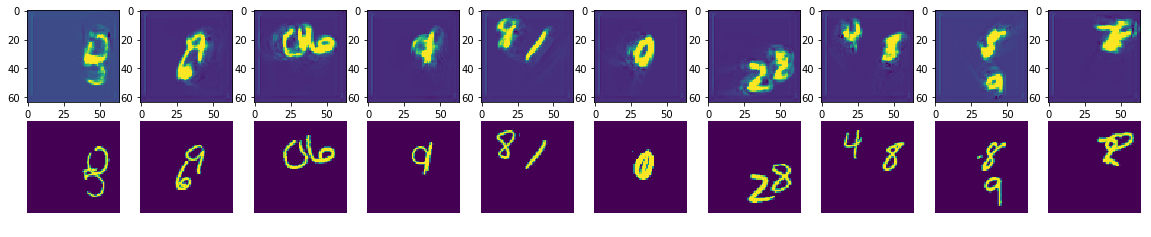

-----------------------------------
Epoch: 32
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0177


<Figure size 432x288 with 0 Axes>

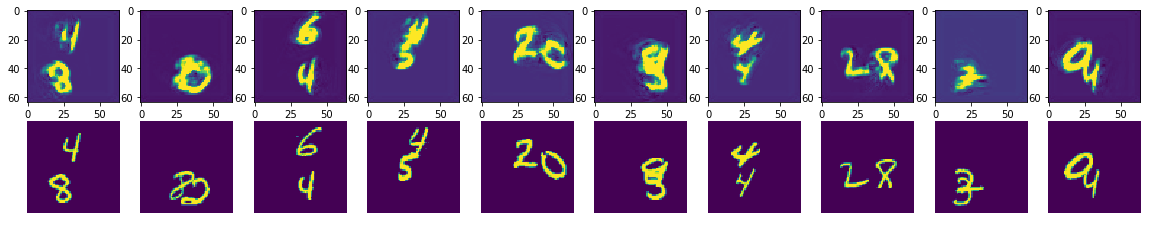

-----------------------------------
Epoch: 33
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0176


<Figure size 432x288 with 0 Axes>

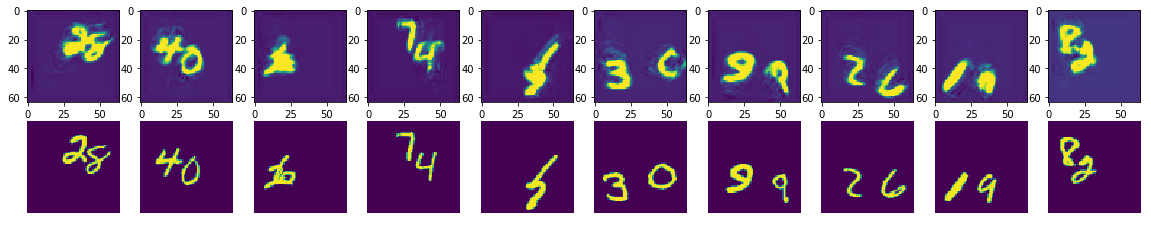

-----------------------------------
Epoch: 34
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0176


<Figure size 432x288 with 0 Axes>

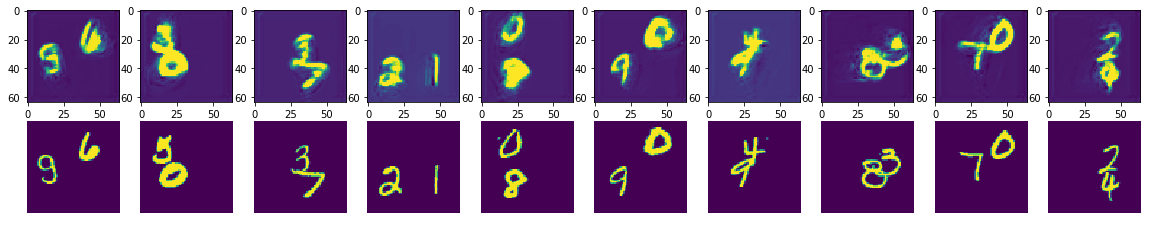

-----------------------------------
Epoch: 35
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0176


<Figure size 432x288 with 0 Axes>

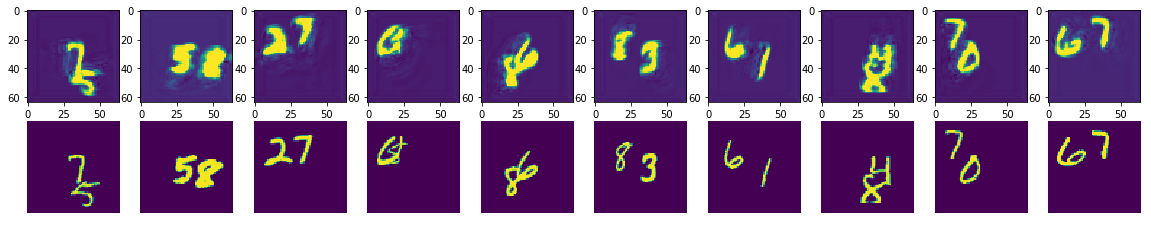

-----------------------------------
Epoch: 36
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0175


<Figure size 432x288 with 0 Axes>

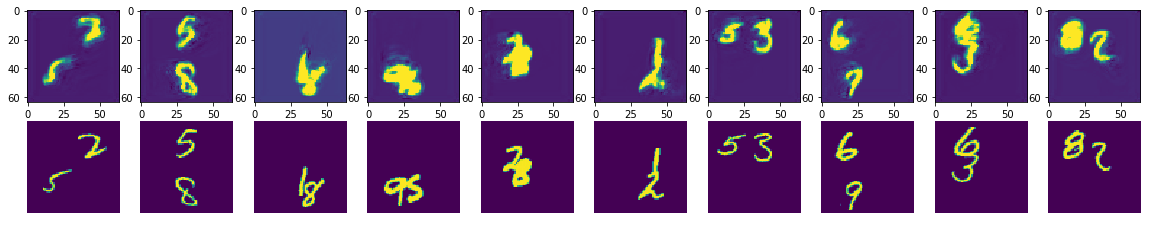

-----------------------------------
Epoch: 37
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0175


<Figure size 432x288 with 0 Axes>

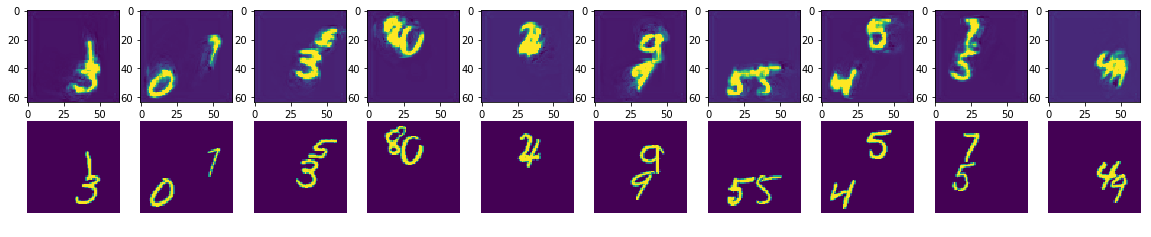

-----------------------------------
Epoch: 38
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0175


<Figure size 432x288 with 0 Axes>

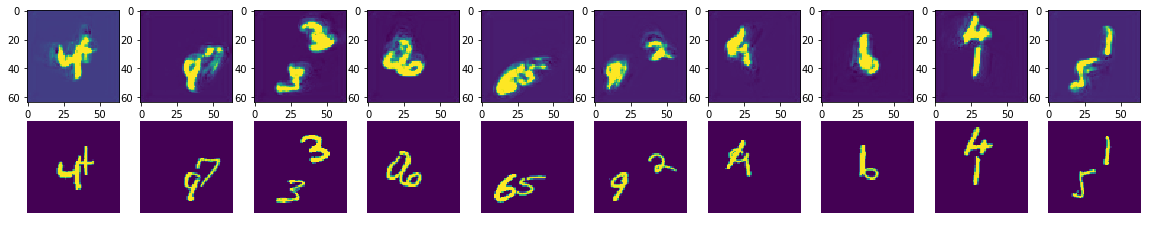

-----------------------------------
Epoch: 39
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0174


<Figure size 432x288 with 0 Axes>

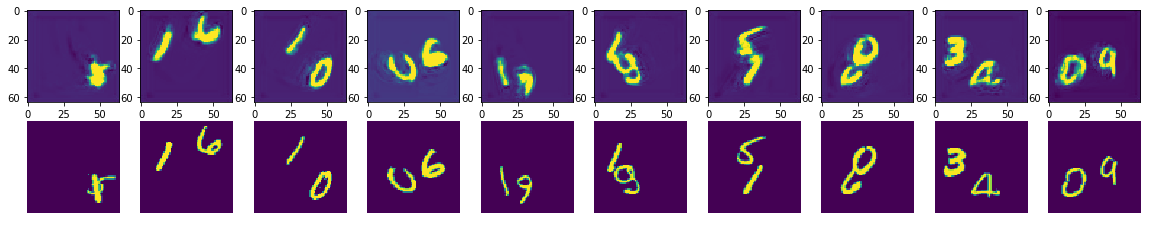

-----------------------------------
Epoch: 40
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0174


<Figure size 432x288 with 0 Axes>

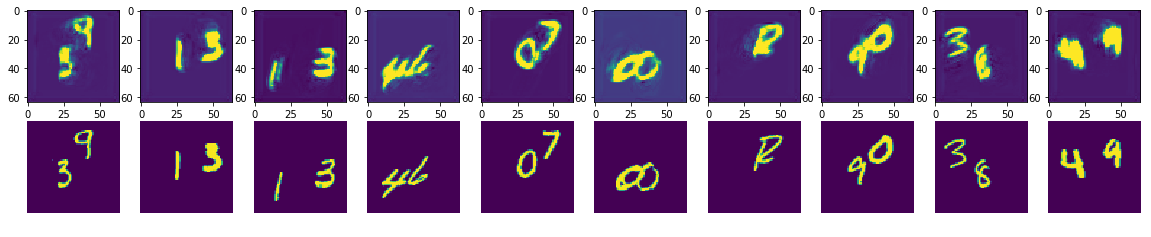

-----------------------------------
Epoch: 41
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0174


<Figure size 432x288 with 0 Axes>

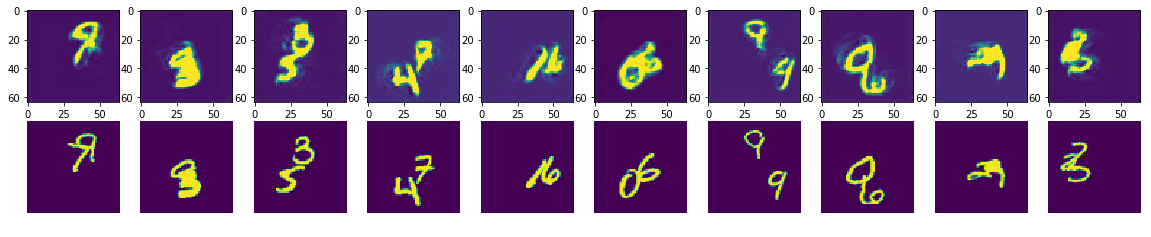

-----------------------------------
Epoch: 42
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0173


<Figure size 432x288 with 0 Axes>

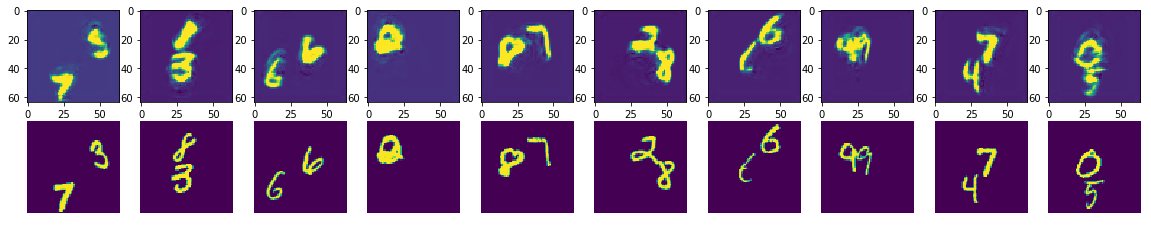

-----------------------------------
Epoch: 43
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0173


<Figure size 432x288 with 0 Axes>

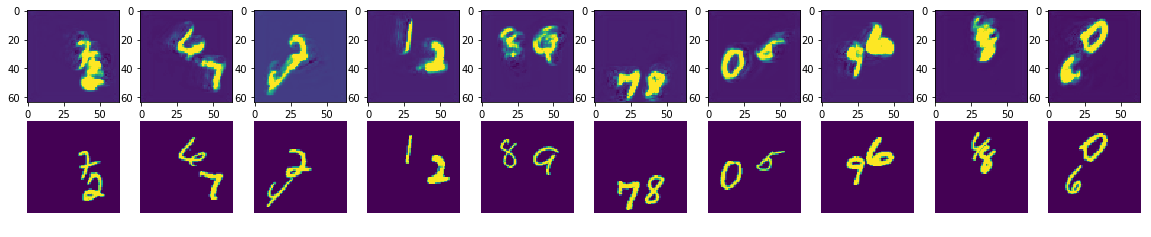

-----------------------------------
Epoch: 44
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0173


<Figure size 432x288 with 0 Axes>

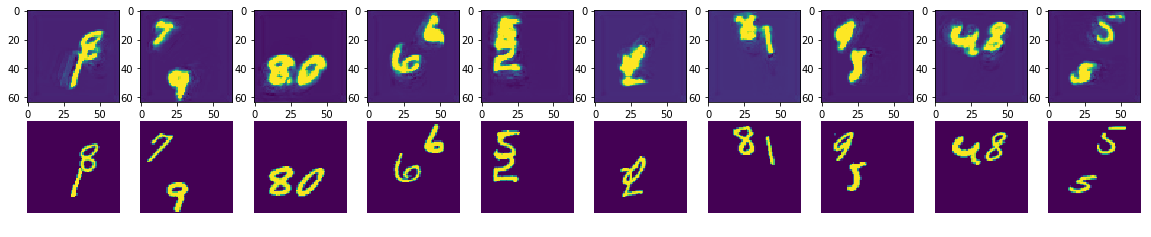

-----------------------------------
Epoch: 45
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0173


<Figure size 432x288 with 0 Axes>

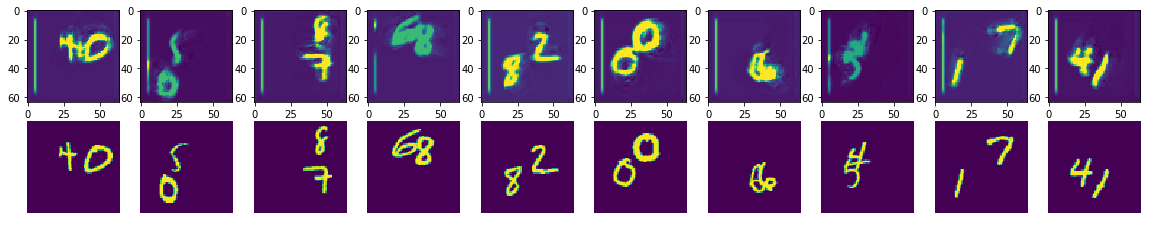

-----------------------------------
Epoch: 46
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0172


<Figure size 432x288 with 0 Axes>

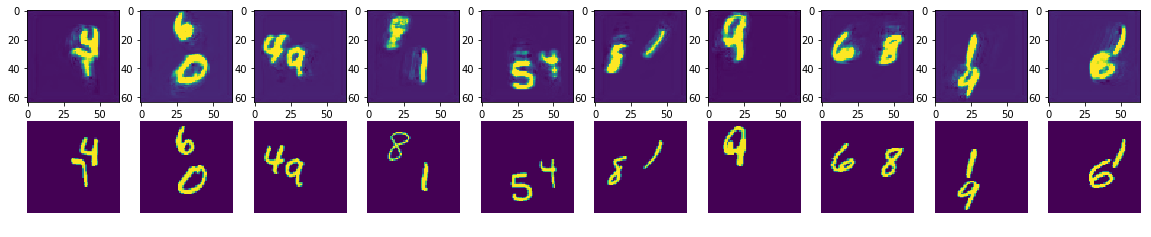

-----------------------------------
Epoch: 47
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0172


<Figure size 432x288 with 0 Axes>

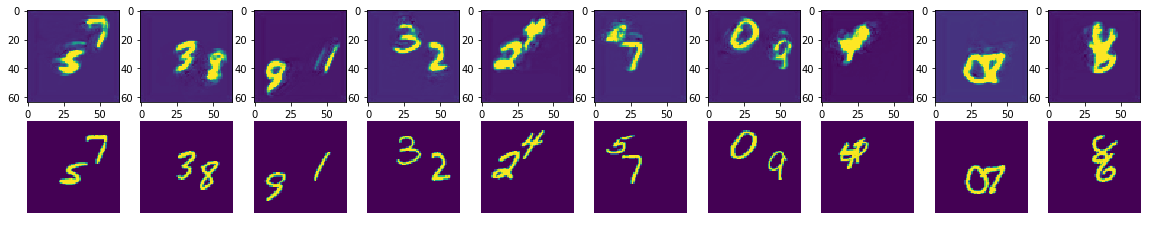

-----------------------------------
Epoch: 48
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0172


<Figure size 432x288 with 0 Axes>

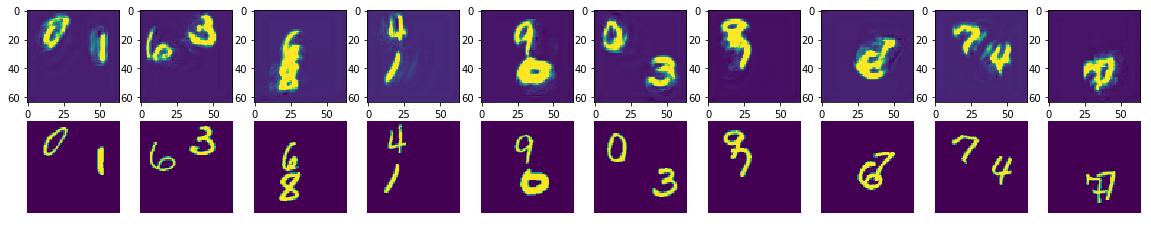

-----------------------------------
Epoch: 49
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0172


<Figure size 432x288 with 0 Axes>

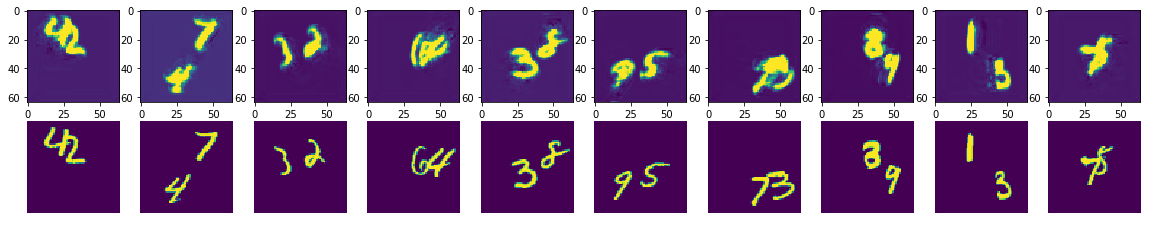

-----------------------------------
Epoch: 50
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0172


<Figure size 432x288 with 0 Axes>

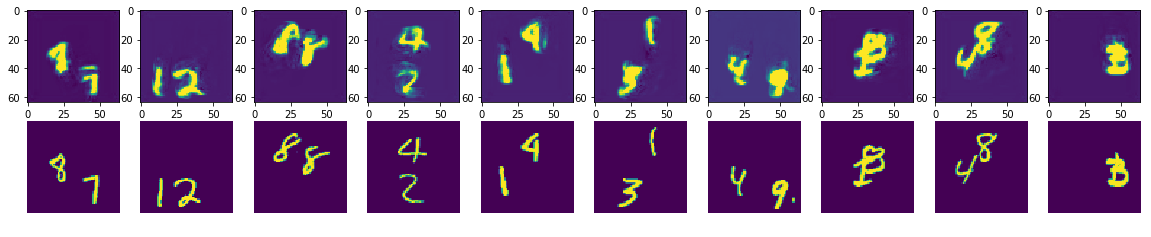

-----------------------------------
Epoch: 51
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0171


<Figure size 432x288 with 0 Axes>

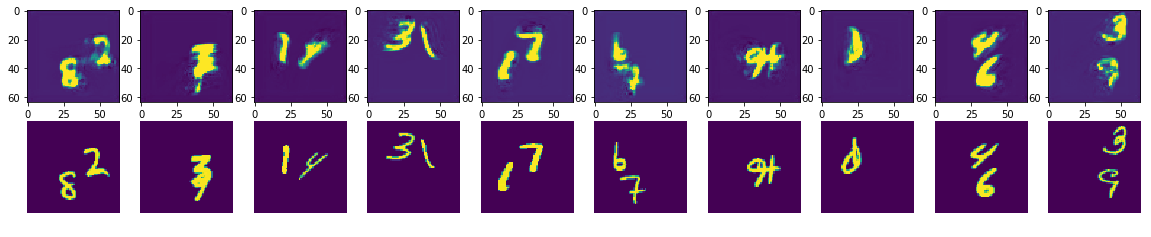

-----------------------------------
Epoch: 52
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0171


<Figure size 432x288 with 0 Axes>

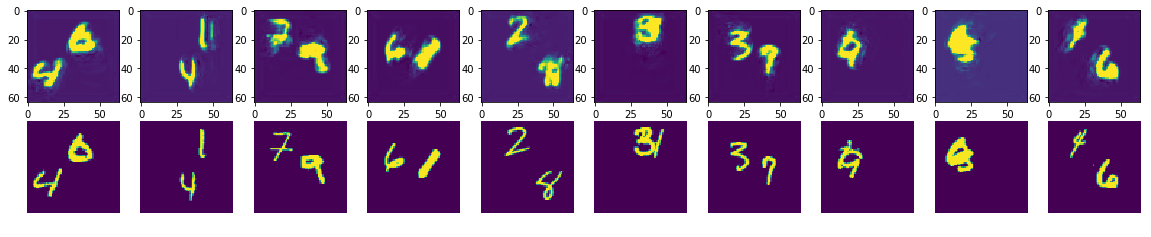

-----------------------------------
Epoch: 53
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0171


<Figure size 432x288 with 0 Axes>

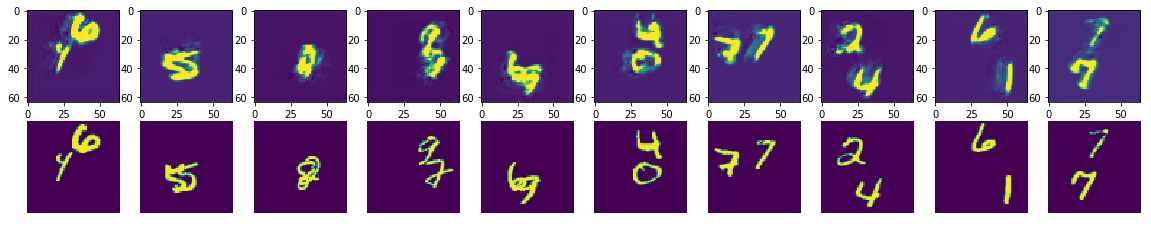

-----------------------------------
Epoch: 54
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0171


<Figure size 432x288 with 0 Axes>

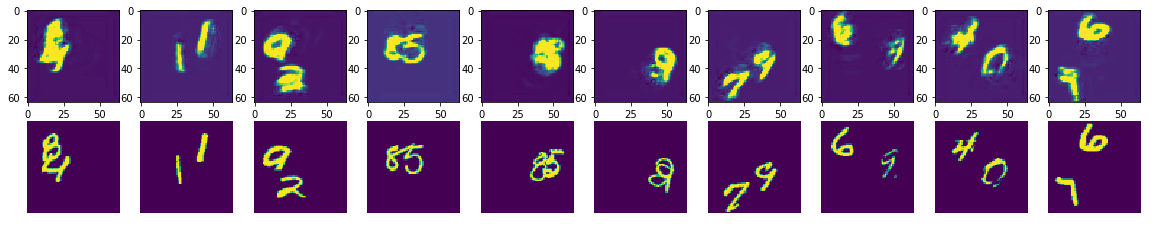

-----------------------------------
Epoch: 55
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0171


<Figure size 432x288 with 0 Axes>

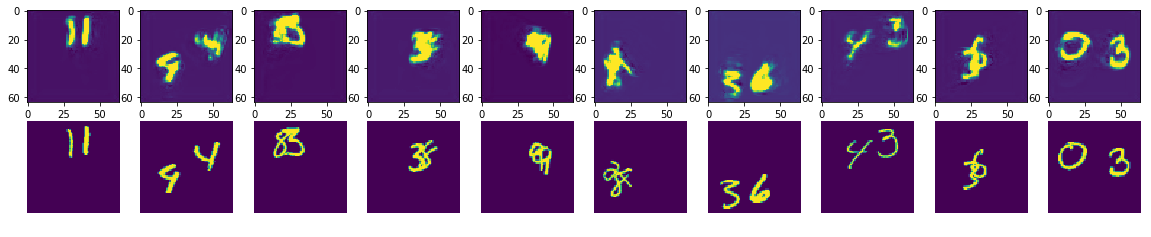

-----------------------------------
Epoch: 56
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

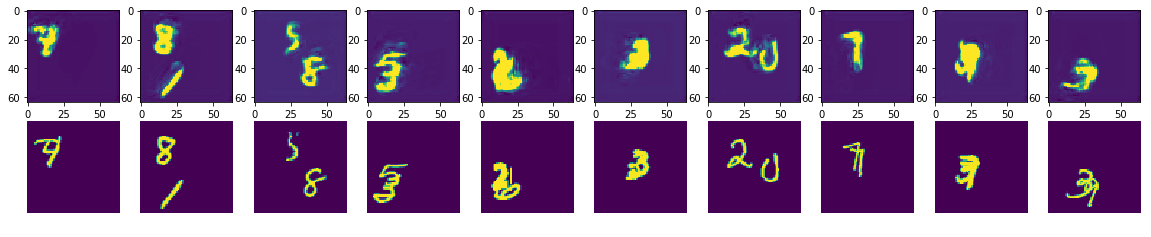

-----------------------------------
Epoch: 57
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

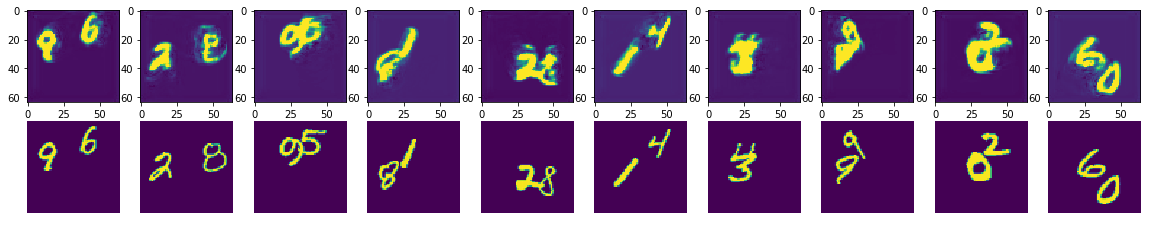

-----------------------------------
Epoch: 58
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

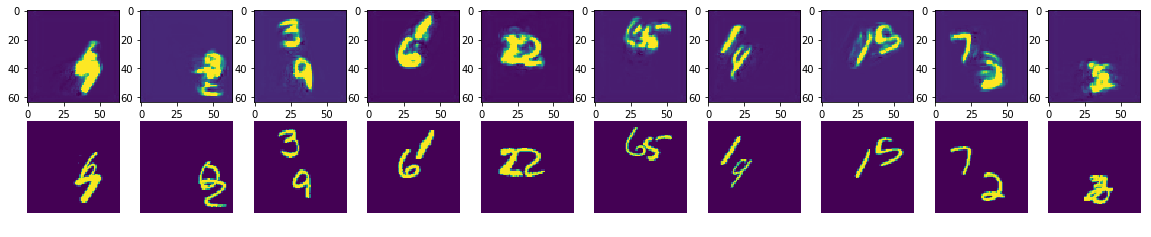

-----------------------------------
Epoch: 59
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

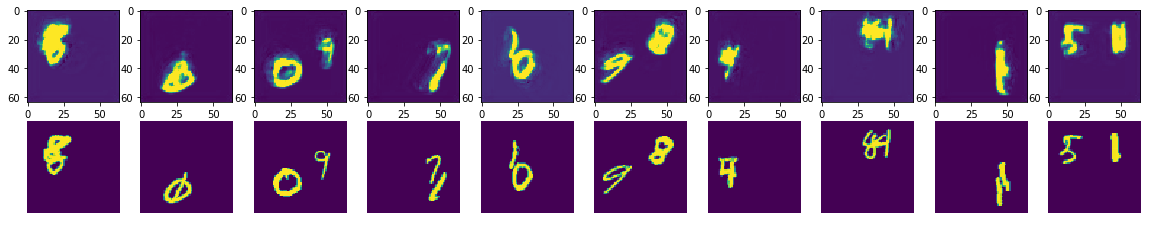

-----------------------------------
Epoch: 60
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

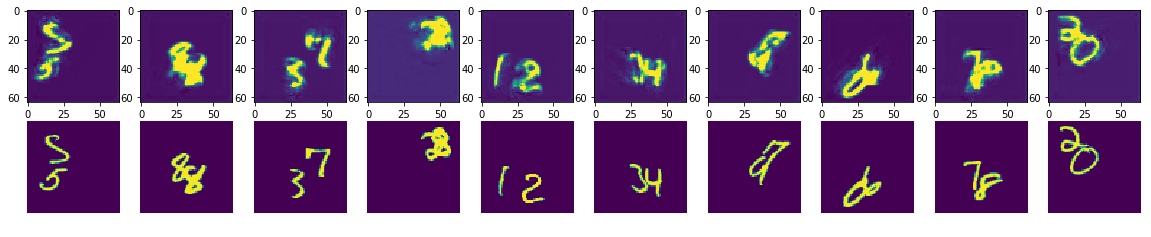

-----------------------------------
Epoch: 61
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0170


<Figure size 432x288 with 0 Axes>

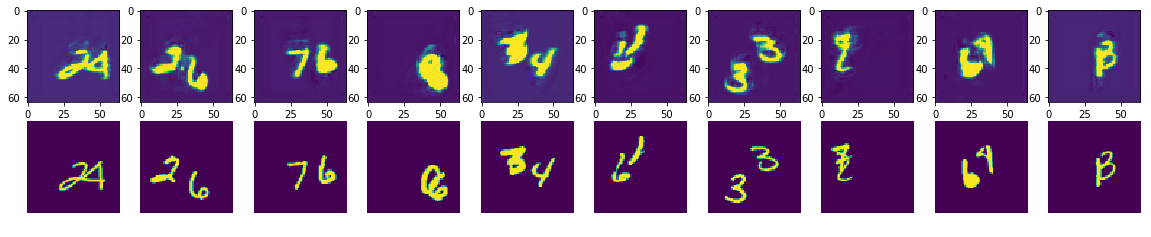

-----------------------------------
Epoch: 62
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

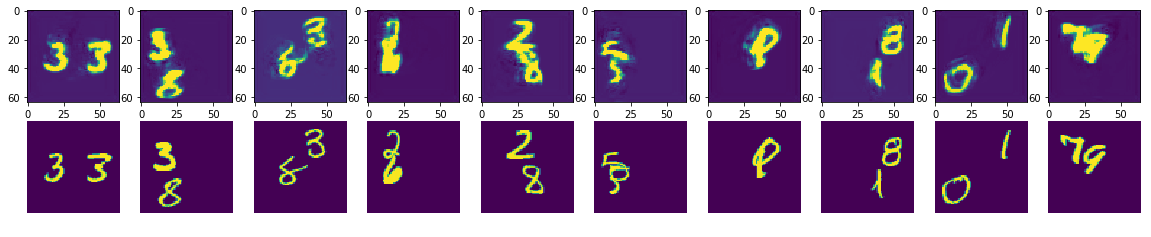

-----------------------------------
Epoch: 63
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

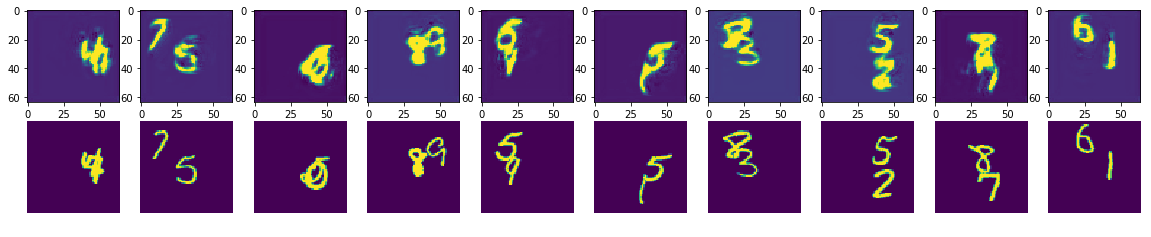

-----------------------------------
Epoch: 64
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

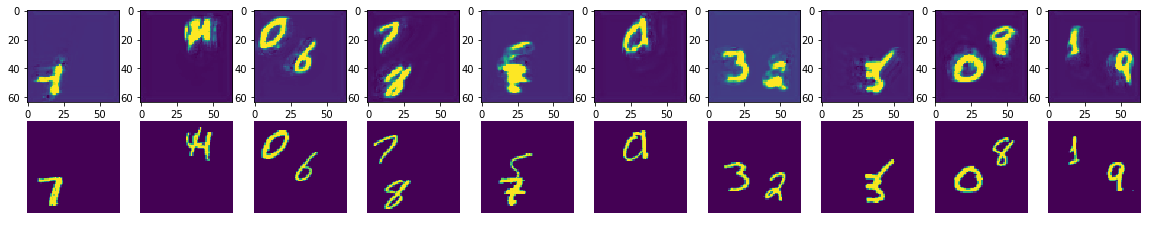

-----------------------------------
Epoch: 65
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

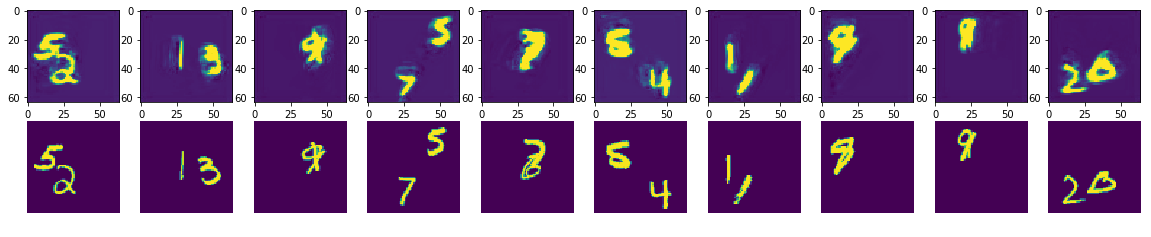

-----------------------------------
Epoch: 66
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

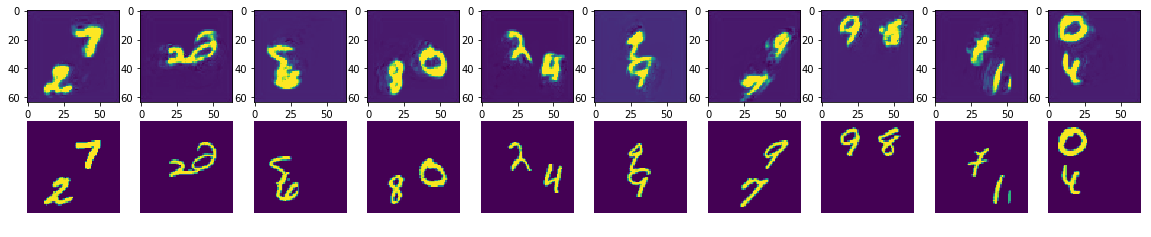

-----------------------------------
Epoch: 67
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

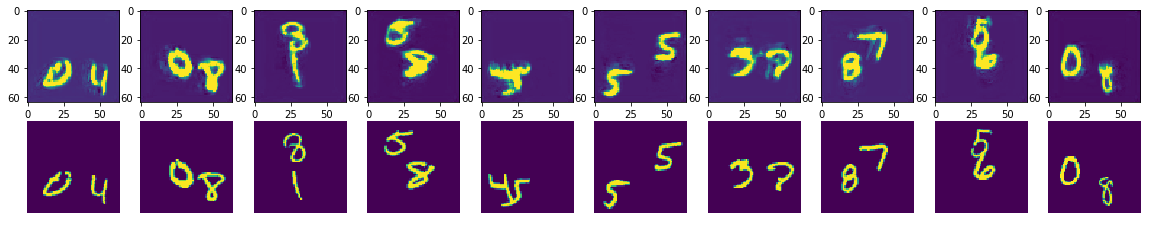

-----------------------------------
Epoch: 68
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0169


<Figure size 432x288 with 0 Axes>

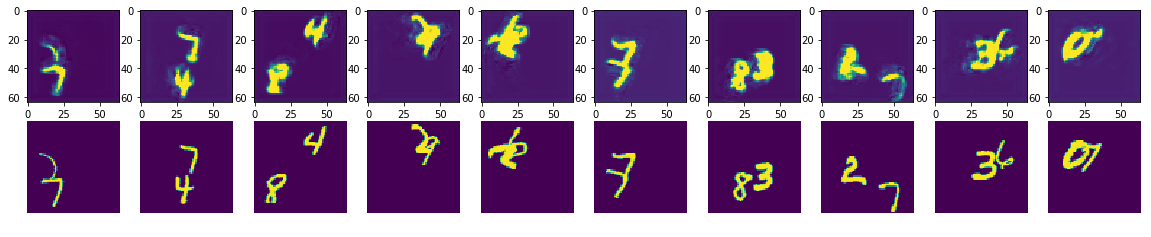

-----------------------------------
Epoch: 69
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

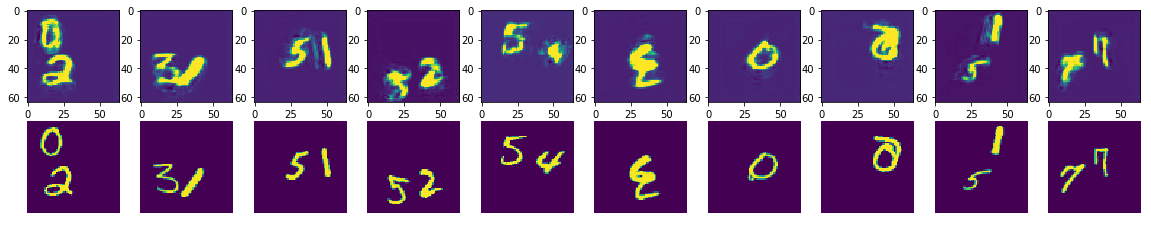

-----------------------------------
Epoch: 70
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

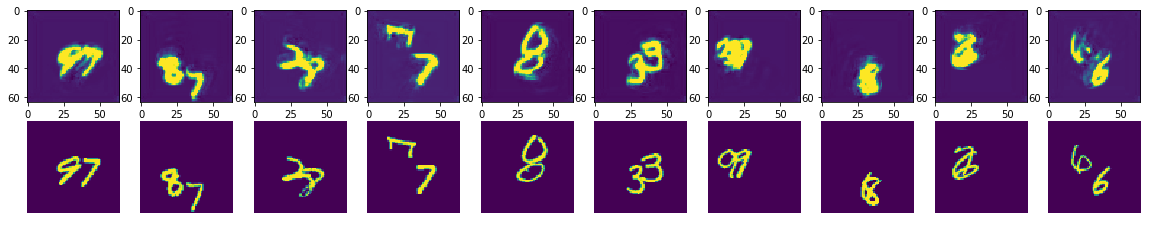

-----------------------------------
Epoch: 71
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

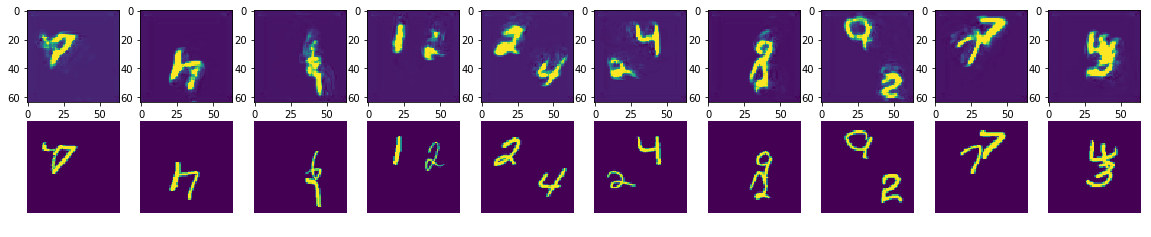

-----------------------------------
Epoch: 72
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

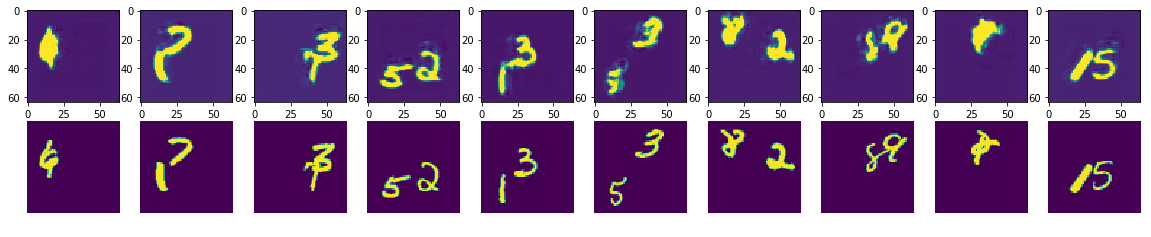

-----------------------------------
Epoch: 73
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

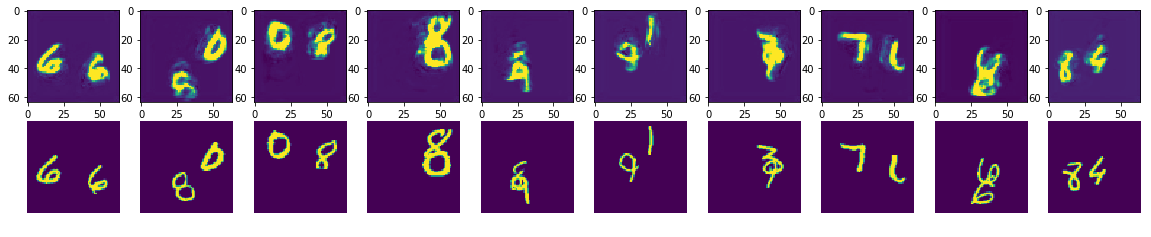

-----------------------------------
Epoch: 74
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

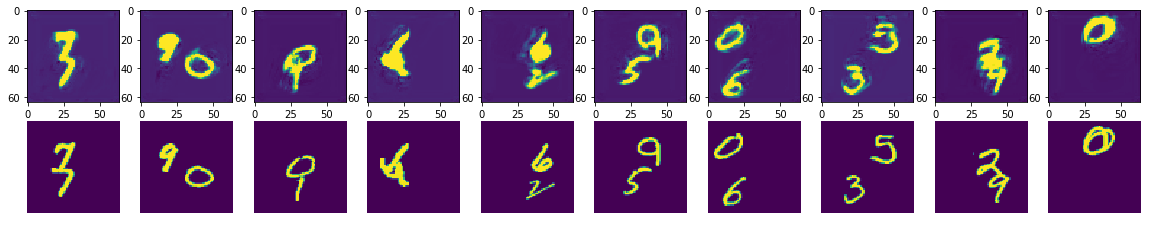

-----------------------------------
Epoch: 75
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

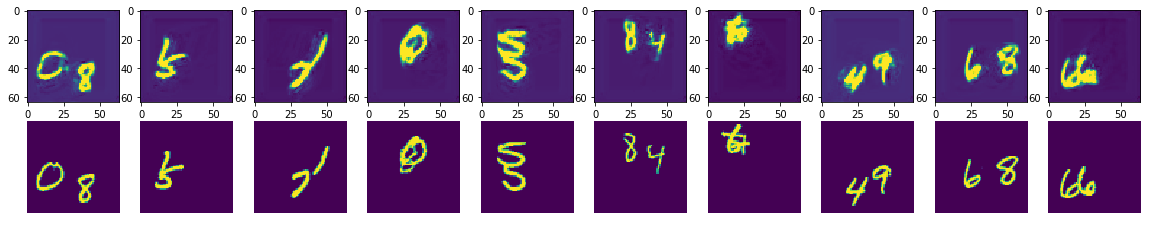

-----------------------------------
Epoch: 76
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

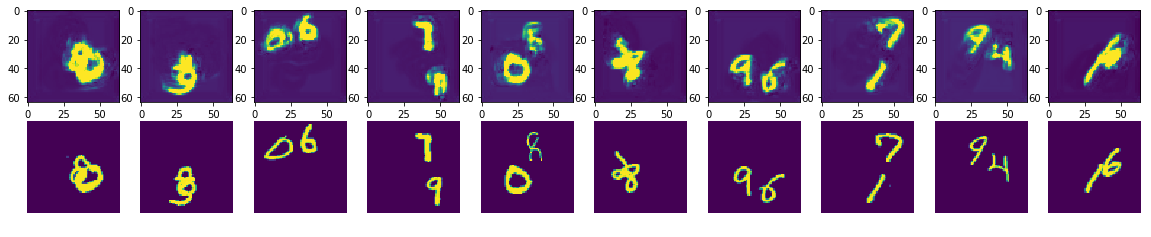

-----------------------------------
Epoch: 77
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0168


<Figure size 432x288 with 0 Axes>

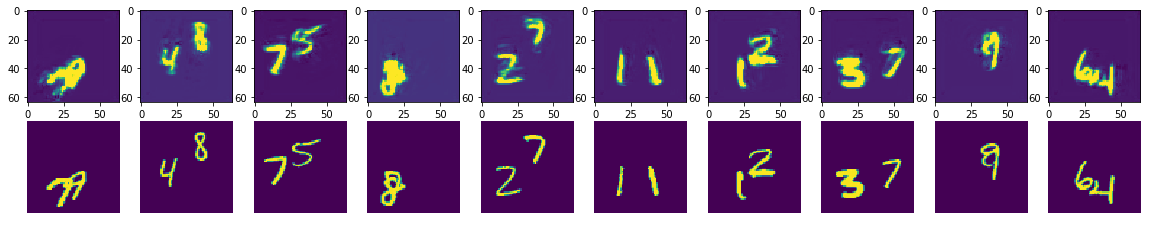

-----------------------------------
Epoch: 78
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

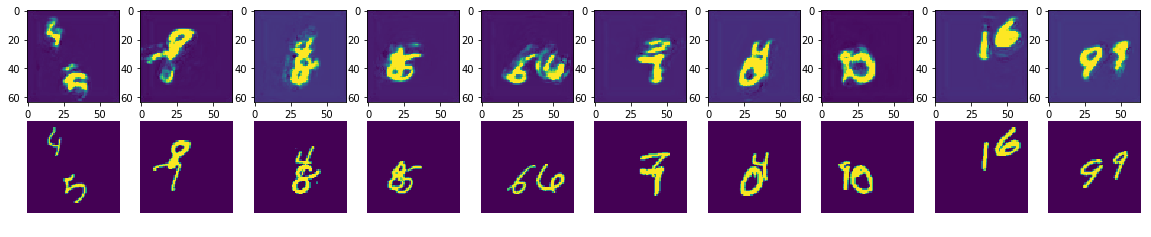

-----------------------------------
Epoch: 79
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

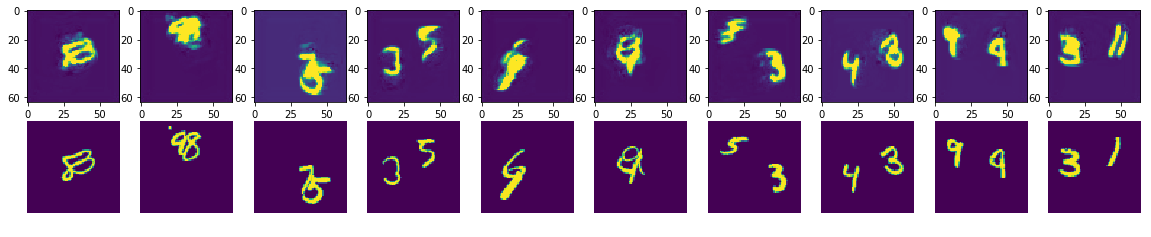

-----------------------------------
Epoch: 80
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

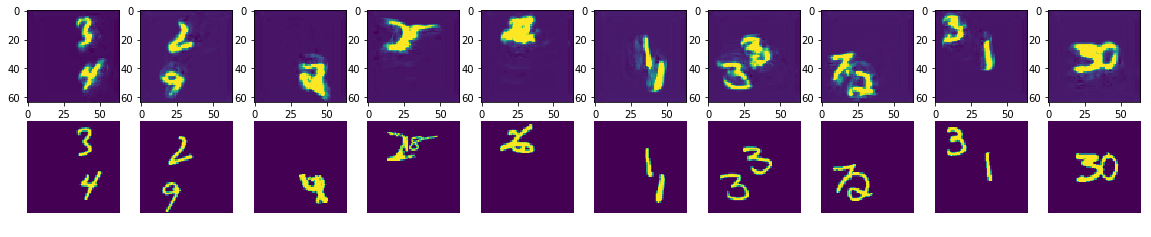

-----------------------------------
Epoch: 81
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

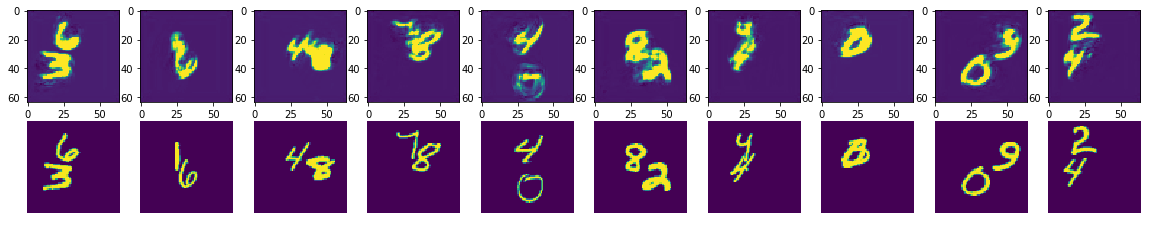

-----------------------------------
Epoch: 82
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

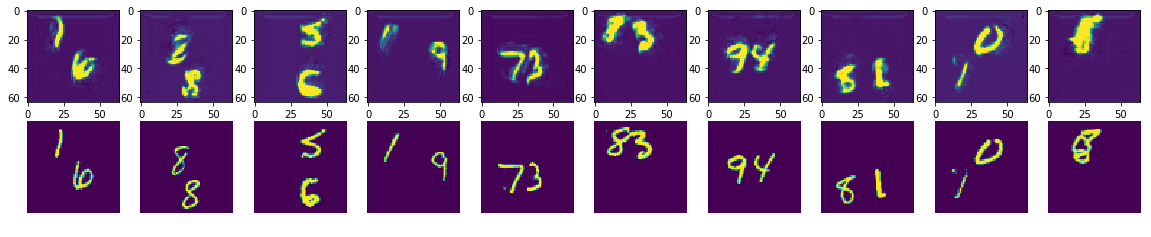

-----------------------------------
Epoch: 83
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

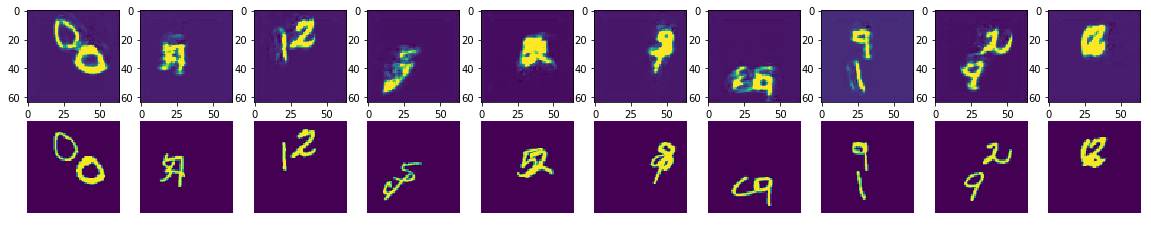

-----------------------------------
Epoch: 84
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

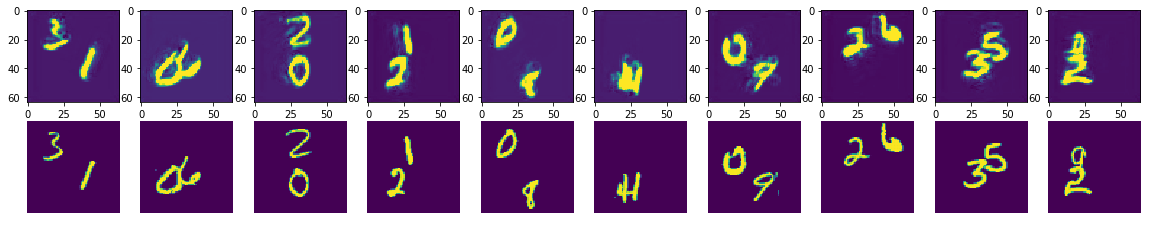

-----------------------------------
Epoch: 85
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

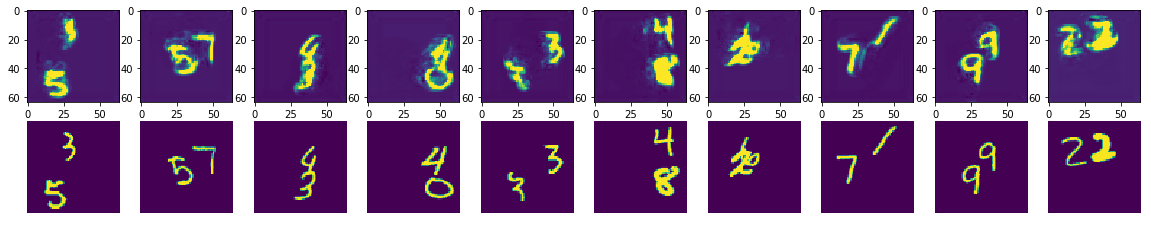

-----------------------------------
Epoch: 86
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0167


<Figure size 432x288 with 0 Axes>

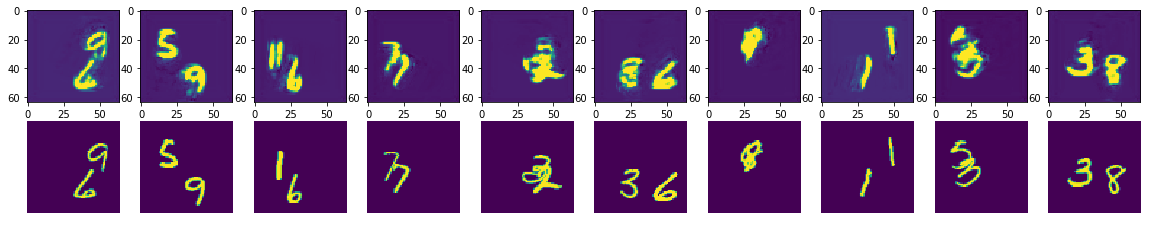

-----------------------------------
Epoch: 87
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

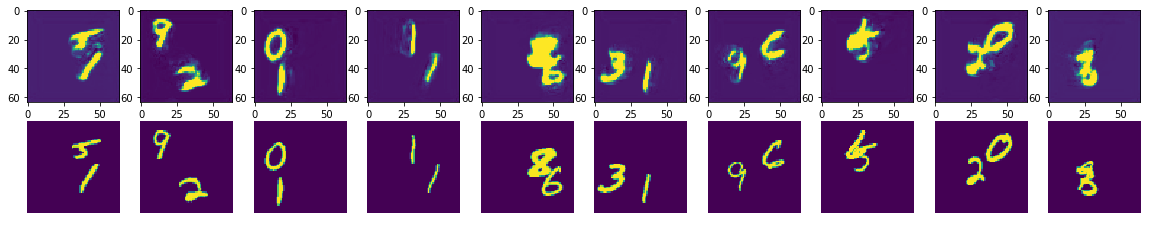

-----------------------------------
Epoch: 88
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

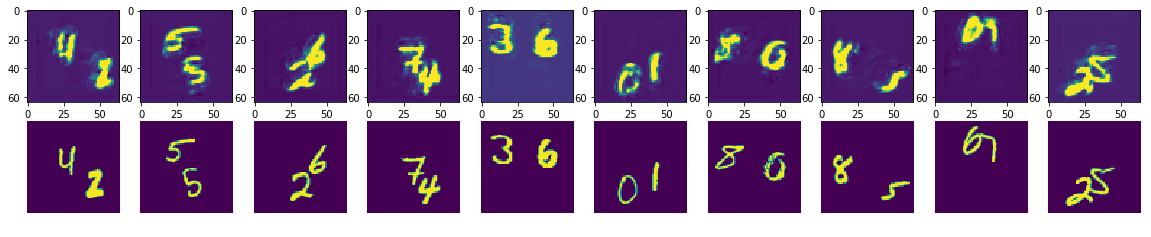

-----------------------------------
Epoch: 89
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

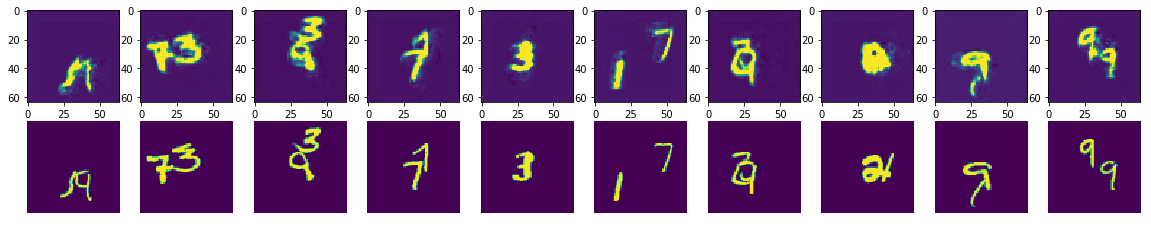

-----------------------------------
Epoch: 90
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

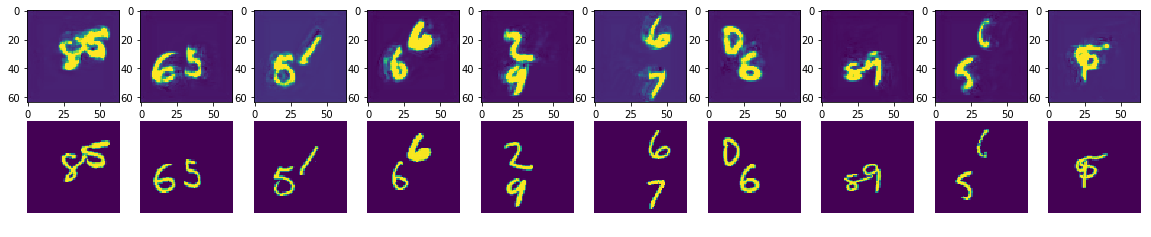

-----------------------------------
Epoch: 91
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

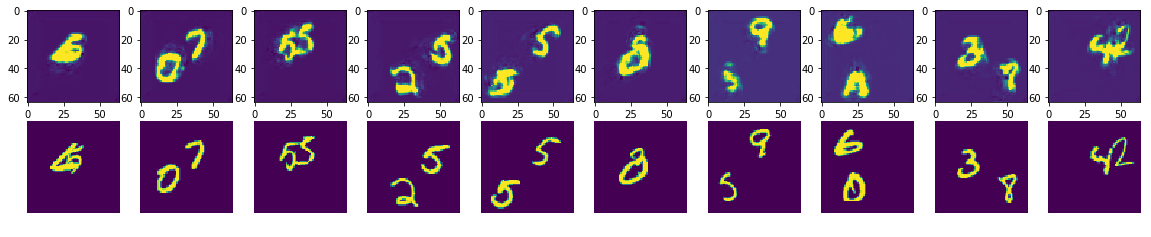

-----------------------------------
Epoch: 92
Epoch 1/1
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

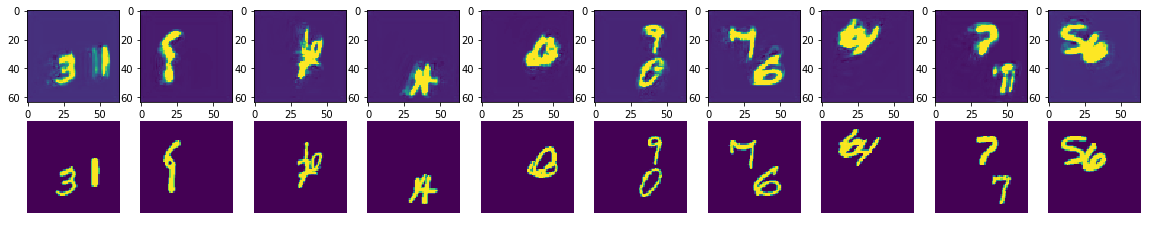

-----------------------------------
Epoch: 93
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

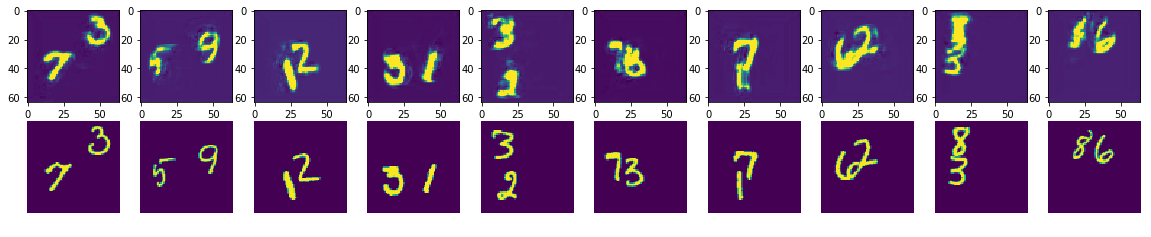

-----------------------------------
Epoch: 94
Epoch 1/1
3000/3000 [==============================] - 51s 17ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

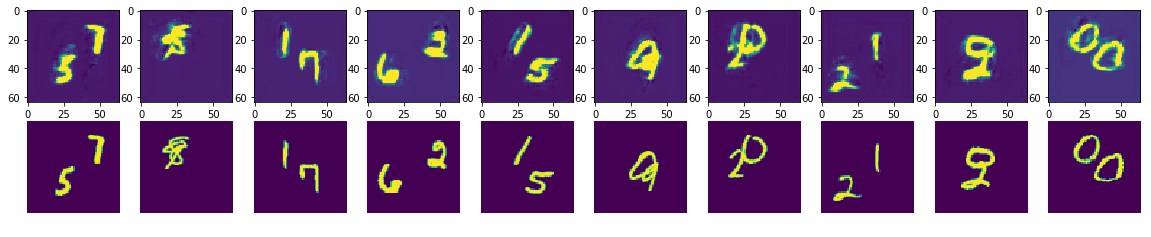

-----------------------------------
Epoch: 95
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

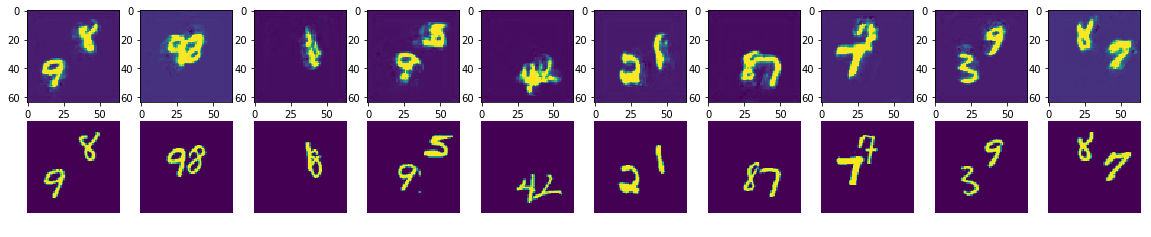

-----------------------------------
Epoch: 96
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0166


<Figure size 432x288 with 0 Axes>

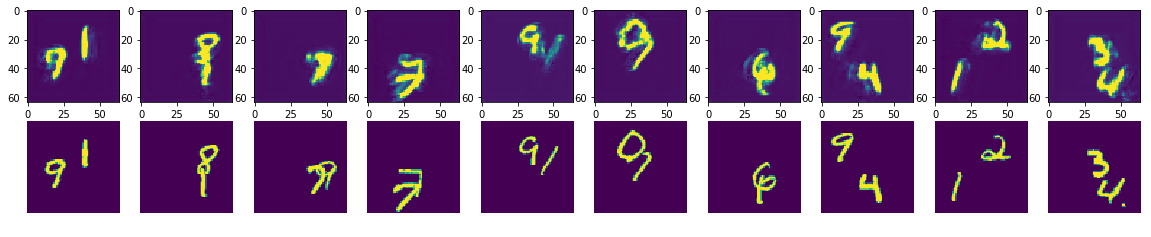

-----------------------------------
Epoch: 97
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

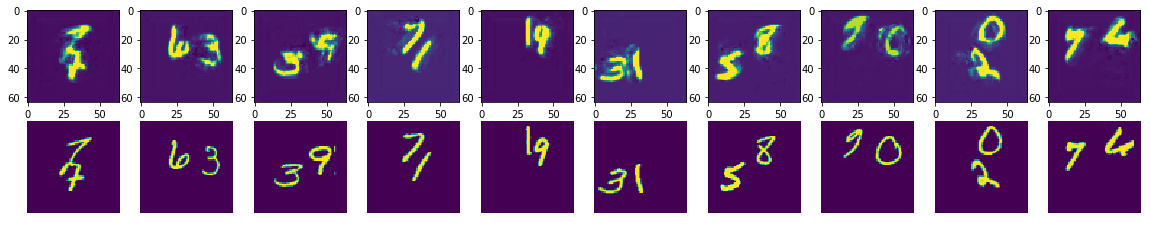

-----------------------------------
Epoch: 98
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

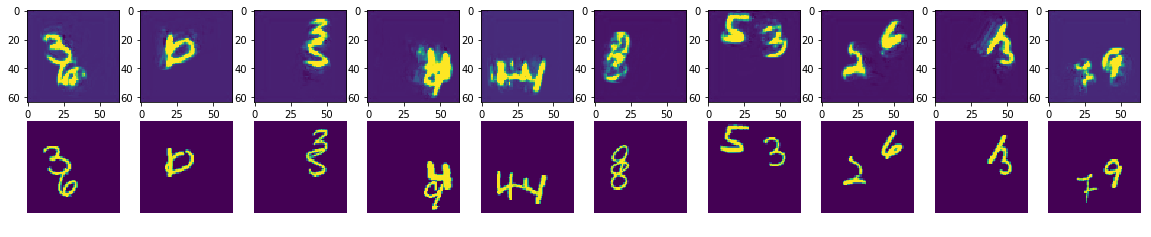

-----------------------------------
Epoch: 99
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

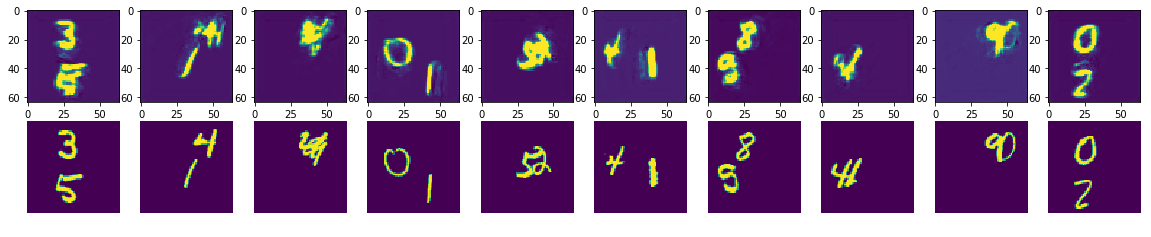

-----------------------------------
Epoch: 100
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

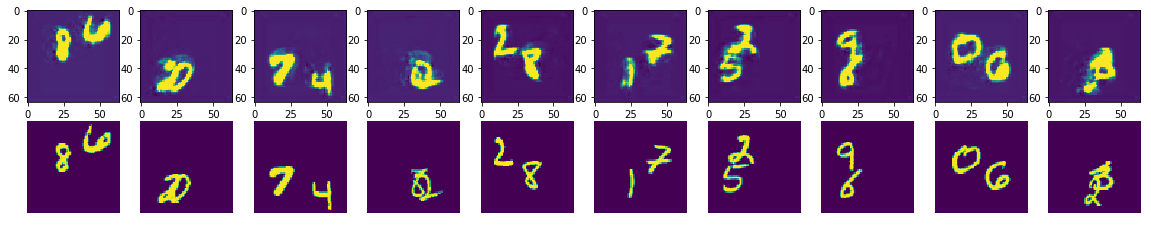

-----------------------------------
Epoch: 101
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

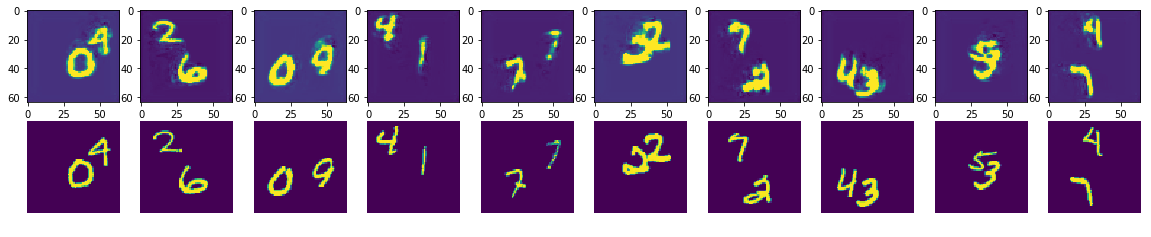

-----------------------------------
Epoch: 102
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

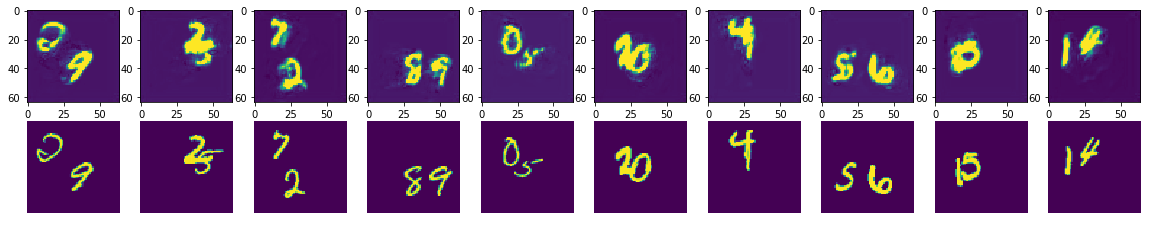

-----------------------------------
Epoch: 103
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

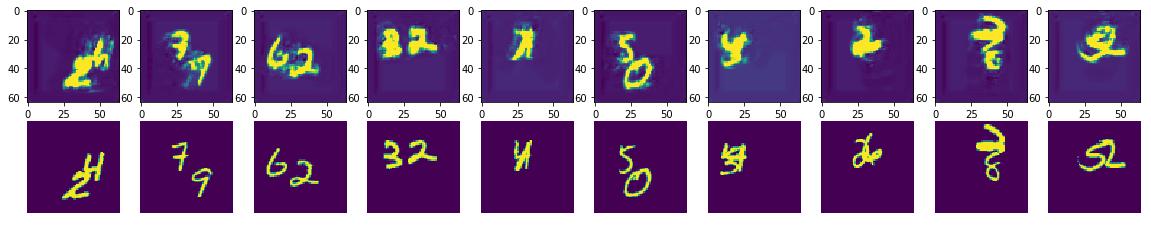

-----------------------------------
Epoch: 104
Epoch 1/1
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0165


<Figure size 432x288 with 0 Axes>

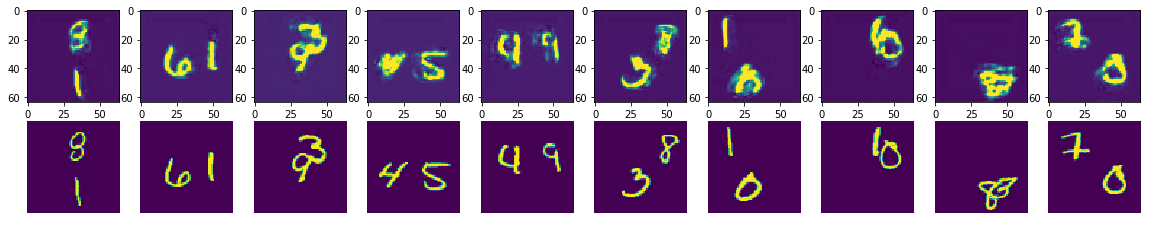

-----------------------------------
Epoch: 105
Epoch 1/1
1480/3000 [=============>................] - ETA: 25s - loss: 0.0165

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [6]:
for epoch in range(1,251):
    print("Epoch:",epoch)
    model3.fit(input_sequence_frames, output_frames, batch_size=10, epochs = 1)
    
    inputs = input_sequence_frames[epoch*10: (epoch+1)*10]
    ground_truth = output_frames[epoch*10: (epoch+1)*10]
    predictions = model3.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()
    if epoch % 10 == 0:
        model3.save('model3_epoch'+str(epoch)+'.h5')
    print('-----------------------------------')